# 01. PyTorch Workflow Fundamentals
## We are covering
-> data prepration and Load
-> Build model
-> Saving and Loading

In [3]:
!uv pip install matplotlib

Using Python 3.12.11 environment at: env_pytorch
Audited 1 package in 33ms


In [4]:
import torch
from torch import nn #Pytorch nueral netowkr
import matplotlib.pyplot as plt

## y = mx + c

In [5]:
weight = 0.7
bias = 0.3

In [6]:
start = 0 
end = 1
step=0.02

X = torch.arange(start=start, end=end, step=step).unsqueeze(dim=1)
y = weight * X + bias


In [7]:
X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [9]:
len(X)

50

## Split the data to train and test

In [8]:
train_split = int(0.8 * len(X))
print(f"Train Split : {train_split}")

Train Split : 40


In [10]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [11]:
len(X_train), len(y_train)

(40, 40)

In [12]:
len(X_test), len(y_test)

(10, 10)

In [13]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

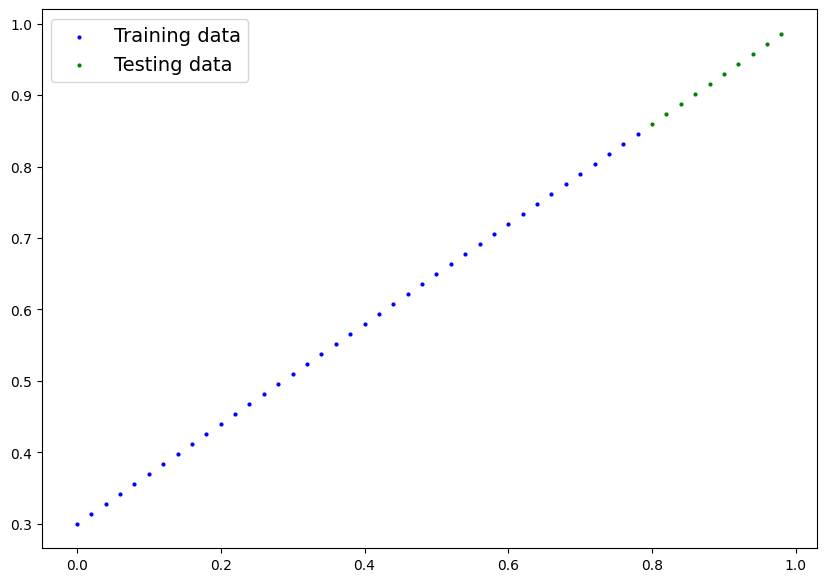

In [14]:
plot_predictions();

## Build the model

In [15]:
class LinearRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [ ]:
torch.rand(1)

## Now lets do a prediction

In [16]:
model = LinearRegressionModel()
y_pred = model(X_test)

In [17]:
model.state_dict()

OrderedDict([('weights', tensor([2.2084])), ('bias', tensor([-0.9455]))])

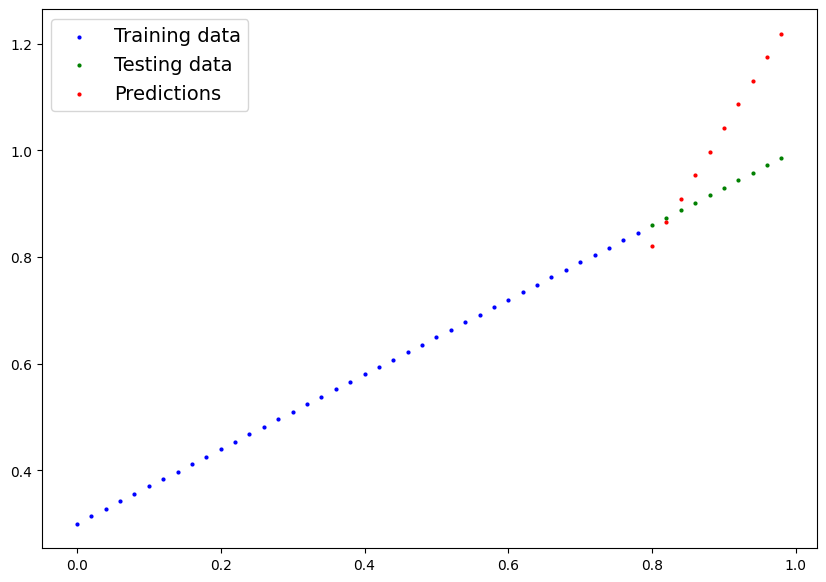

In [18]:
plot_predictions(predictions=y_pred.detach())

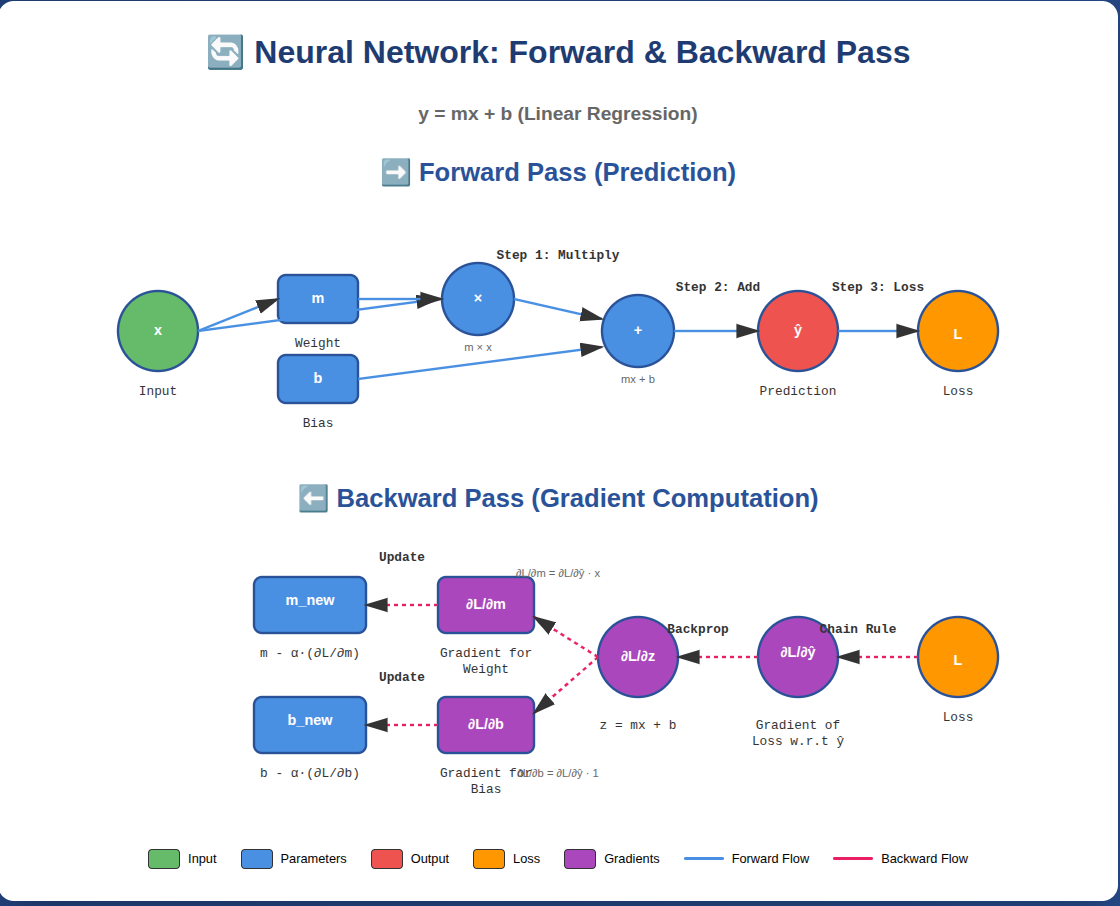



### PyTorch training loop
For the training loop, we'll build the following steps:

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_train)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_train)` | 
| 3 | Zero gradients | The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. | `optimizer.zero_grad()` |
| 4 | Perform backpropagation on the loss | Computes the gradient of the loss with respect for every model parameter to be updated  (each parameter with `requires_grad=True`). This is known as **backpropagation**, hence "backwards".  | `loss.backward()` |
| 5 | Update the optimizer (**gradient descent**) | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()` |

In [19]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss 

# Create the optimizer
optimizer = torch.optim.SGD(params=model.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step,

In [20]:
model.state_dict()

OrderedDict([('weights', tensor([2.2084])), ('bias', tensor([-0.9455]))])

In [21]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model(X_train)
    

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, 
      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.6572229862213135 | MAE Test Loss: 0.11557231098413467 
Epoch: 10 | MAE Train Loss: 0.5500382781028748 | MAE Test Loss: 0.23839911818504333 
Epoch: 20 | MAE Train Loss: 0.4788055419921875 | MAE Test Loss: 0.3389735519886017 
Epoch: 30 | MAE Train Loss: 0.4322893023490906 | MAE Test Loss: 0.417066752910614 
Epoch: 40 | MAE Train Loss: 0.40082040429115295 | MAE Test Loss: 0.47799253463745117 
Epoch: 50 | MAE Train Loss: 0.3783380389213562 | MAE Test Loss: 0.5274483561515808 
Epoch: 60 | MAE Train Loss: 0.3623135983943939 | MAE Test Loss: 0.564900279045105 
Epoch: 70 | MAE Train Loss: 0.3502795398235321 | MAE Test Loss: 0.5949660539627075 
Epoch: 80 | MAE Train Loss: 0.34085705876350403 | MAE Test Loss: 0.619181752204895 
Epoch: 90 | MAE Train Loss: 0.33364471793174744 | MAE Test Loss: 0.6361716389656067 


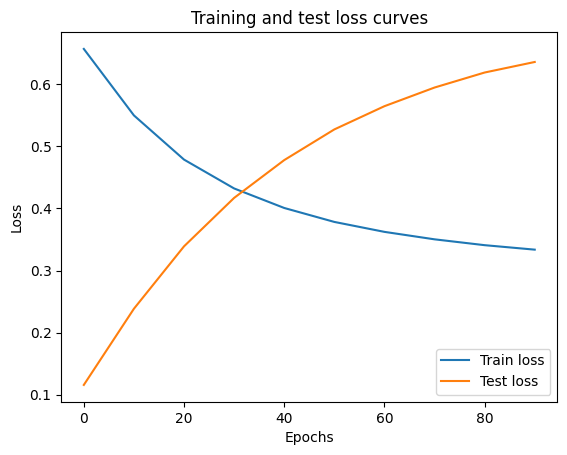

In [22]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [23]:
print("The model learned the following values for weights and bias:")
print(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([2.2653]), 'bias': tensor([-0.4445])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [25]:
# 1. Set the model in evaluation mode
model.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model(X_test)
y_preds

tensor([[1.3677],
        [1.4130],
        [1.4583],
        [1.5036],
        [1.5490],
        [1.5943],
        [1.6396],
        [1.6849],
        [1.7302],
        [1.7755]])

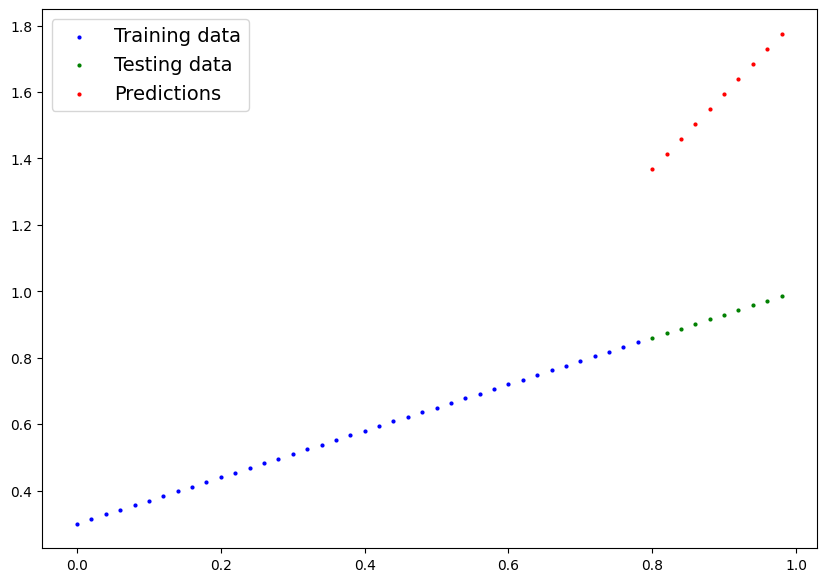

In [26]:
plot_predictions(predictions=y_preds)

In [30]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 1000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, 
      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.08061819523572922 | MAE Test Loss: 0.1880367547273636 
Epoch: 10 | MAE Train Loss: 0.07718980312347412 | MAE Test Loss: 0.17976458370685577 
Epoch: 20 | MAE Train Loss: 0.07375113666057587 | MAE Test Loss: 0.17149242758750916 
Epoch: 30 | MAE Train Loss: 0.07031641155481339 | MAE Test Loss: 0.16390712559223175 
Epoch: 40 | MAE Train Loss: 0.06688643991947174 | MAE Test Loss: 0.15563496947288513 
Epoch: 50 | MAE Train Loss: 0.06344769150018692 | MAE Test Loss: 0.14736278355121613 
Epoch: 60 | MAE Train Loss: 0.06001461297273636 | MAE Test Loss: 0.13977742195129395 
Epoch: 70 | MAE Train Loss: 0.056582916527986526 | MAE Test Loss: 0.13150493800640106 
Epoch: 80 | MAE Train Loss: 0.05314410850405693 | MAE Test Loss: 0.12323243916034698 
Epoch: 90 | MAE Train Loss: 0.049712665379047394 | MAE Test Loss: 0.1156468391418457 
Epoch: 100 | MAE Train Loss: 0.046279288828372955 | MAE Test Loss: 0.10737435519695282 
Epoch: 110 | MAE Train Loss: 0.04284047335386276 | MA

In [31]:
# 1. Set the model in evaluation mode
model.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():

  y_preds = model(X_test)
y_preds

tensor([[0.8727],
        [0.8869],
        [0.9011],
        [0.9153],
        [0.9294],
        [0.9436],
        [0.9578],
        [0.9720],
        [0.9862],
        [1.0004]])

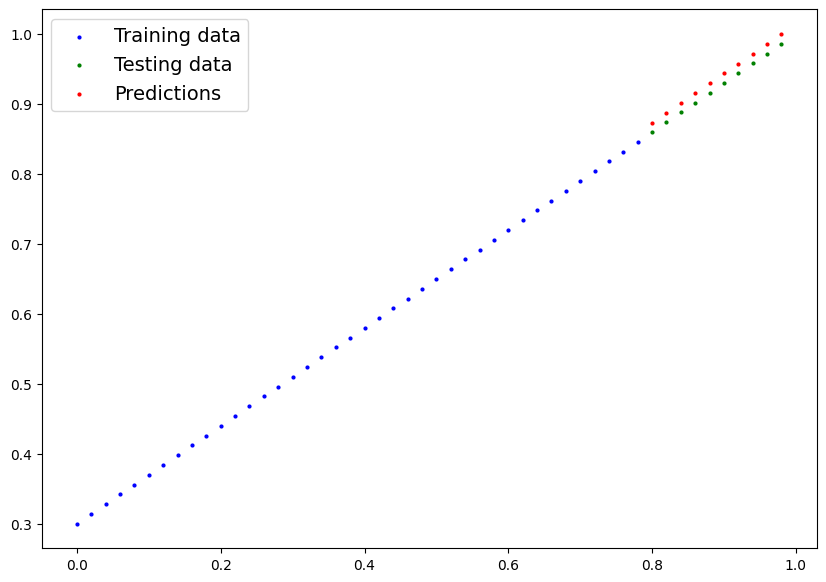

In [32]:
plot_predictions(predictions=y_preds)

In [33]:
model.state_dict()

OrderedDict([('weights', tensor([0.7096])), ('bias', tensor([0.3050]))])

In [34]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_linear_regressin.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_linear_regressin.pth


In [35]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [36]:
# 1. Put the loaded model into evaluation mode
loaded_model.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test) 

In [37]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.7096])), ('bias', tensor([0.3050]))])